In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
import os

In [2]:
# Read in temperature observations for 2015
obs = pd.read_csv('Shuman-Round.txt', delim_whitespace=True) 
obs['datetime'] = pd.to_datetime(obs['datetime'], format='%m/%d/%Y')  # convert to datetime format
obs['Month'] = obs['datetime'].dt.month      # create Month column from datetime
obs['Year'] = obs['datetime'].dt.year    # create Year column from datetime
obs['Day'] = obs['datetime'].dt.day
obs_mon =obs.groupby(['Month','Day','Year']).mean()  # groupby Year, Month, Day and take average of groups --> daily averages
obs_mon.reset_index(inplace=True)
obs_mon['Julian'] = range(178,293)
obs_mon

,Month,Day,Year,Round,Jeep,Fishhook,Julian
0,6,27,2015,8.08250,11.60775,10.29825,178
1,6,28,2015,7.07400,12.10450,10.97900,179
2,6,29,2015,8.36300,12.60975,11.39450,180
3,6,30,2015,9.69625,13.10425,11.97475,181
4,7,1,2015,9.92725,13.44000,12.01400,182
5,7,2,2015,9.90675,13.55725,11.85450,183
6,7,3,2015,9.80875,13.62525,11.95275,184
7,7,4,2015,10.75200,13.72825,12.42750,185
8,7,5,2015,10.91150,13.90775,12.59450,186
9,7,6,2015,9.93875,13.82375,12.08900,187


(178, 292)

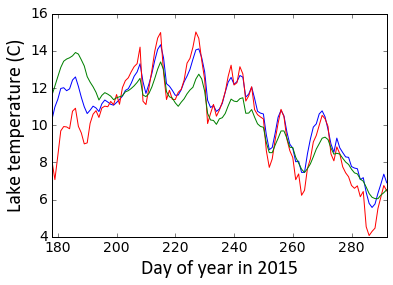

In [3]:
# plot temperature observations for 2015
plt.plot(obs_mon.Julian,obs_mon.Fishhook,color="blue")
plt.plot(obs_mon.Julian,obs_mon.Round,color="red")
plt.plot(obs_mon.Julian,obs_mon.Jeep,color="green")
plt.xlabel("Day of year in 2015",fontname='Calibri', fontsize=20)
plt.ylabel("Lake temperature (C)", fontname='Calibri',fontsize=20)
plt.tick_params(labelsize=14)
plt.xlim(178,292)
# Note divergence of three lakes prior to about Julian Day 200 --> not a straightforward response to weather forcing in early
# summer. Groundwater? Chose not to use days prior to 199 in the calibration.

In [4]:
# Read in parameter values used for 1000 calibration simulations. Values for parameters chosen from specified ranges using latin
# hypercube.
params = pd.read_csv('lake-params1000.txt', delim_whitespace=True, header=None) 
params['cdrn'] = 2.e-3*params[0] + 1.e-3  #  neutral drag coefficient from 1 to 3 e-3
params['eta'] = 0.3*params[1] + 0.2       # shortwave extinction coefficient from 0.2 to 0.5
params['albslush'] = 0.3*params[3] + 0.4       # Slush albedo from 0.4 to 0.7
params['albsnow'] = 0.2*params[2] + 0.7       # Snow albedo from 0.7 to 0.9
params['albsed'] = 0.15*params[6] + 0.05     # Sediment albedo from 0.05 to 0.2
params['condsed'] = 2.0*params[5] + 0.5       # Sediment thermal conductivity from 0.5 to 2.5
params['csed'] = 2.e6*params[4] + 2.e6     # Sediment specific heat capacity from 2e6 to 4e6
trials = range(1,1001)
params['trial']=trials
params[['cdrn','eta','albslush','albsnow','albsed','condsed','csed','trial']].head(5)

,cdrn,eta,albslush,albsnow,albsed,condsed,csed,trial
0,0.001712,0.370249,0.681912,0.738494,0.107631,1.827156,3.303101e+06,1
1,0.001569,0.417089,0.585275,0.750314,0.078978,1.875730,3.567110e+06,2
2,0.001887,0.459887,0.566760,0.821221,0.175542,1.849747,2.675882e+06,3
3,0.002624,0.251617,0.674358,0.782610,0.128737,1.985988,2.511200e+06,4
4,0.001441,0.361085,0.628294,0.782280,0.121939,1.216793,3.340656e+06,5


In [5]:
# read in 2015 lake temperatures from 1000 calibration simulations. These simulations are targeting Round Lake in that I used
# time-varying lake depths matching those measured by Bryan's group for Round Lake.
path = r'C:\Users\carrie.morrill\Jupyter\LAKE-CALIBRATION\MOD-Rvar'                     
all_files = glob.glob(os.path.join(path, "MOD-RVar*.txt"))    
df_from_each_file = (pd.read_csv(f, usecols=range(3,4), skiprows=178, header=None) for f in all_files)
LST = pd.concat(df_from_each_file, axis=1, ignore_index=True)
LST['Julian'] = range(178,366)

fnames = list()   # note: Python does not read in trials in numeric order, so get Python order here
for s in all_files:
    fnames.append(int(s[67:-4]))
    
LST.head(5)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Julian
0,16.4964,15.1184,17.4426,20.6343,15.4716,17.4018,14.9838,14.8058,14.3003,15.8636,...,18.3734,17.2765,15.8917,15.7074,19.9842,17.0188,17.8801,17.9256,19.4608,178
1,16.6366,15.2598,17.5981,20.7766,15.6088,17.5605,15.1101,14.9515,14.4460,16.0060,...,18.5209,17.4153,16.0285,15.8449,20.1273,17.1555,18.0230,18.0695,19.6073,179
2,16.5115,15.1437,17.5336,20.6629,15.4719,17.5050,14.9419,14.8532,14.3466,15.8841,...,18.4144,17.2811,15.8878,15.7065,20.0172,17.0094,17.9024,17.9497,19.5054,180
3,16.6041,15.2513,17.6323,20.7307,15.5733,17.6062,15.0496,14.9680,14.4701,15.9823,...,18.4967,17.3655,15.9839,15.8048,20.0894,17.0940,17.9849,18.0320,19.5827,181
4,17.2753,15.9249,18.1955,21.3521,16.2746,18.1566,15.8182,15.6350,15.1649,16.6547,...,19.1280,18.0498,16.6885,16.5072,20.7093,17.8028,18.6420,18.6884,20.1956,182


In [6]:
# Calculate values for objective functions to choose best calibration simulations
def bias(predictions, targets):  # note: I am not using bias as a criteria, just curious
    return (targets.mean() - predictions.mean())
def NashSut(predictions, targets):
    return (1. - ((predictions - targets) ** 2).sum()/((targets - targets.mean()) ** 2).sum())
def rsr(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).sum())/np.sqrt(((targets - targets.mean()) ** 2).sum())

plines = ['NSE','rsr','bias']
index = range(0,1000)  
LST_stat = pd.DataFrame(index=index, columns=plines)
for i in range(0,1000):
    LST_stat.iloc[i,0]=NashSut(LST.iloc[21:115,i],obs_mon.iloc[21:115,3])  # want > 0.75
    LST_stat.iloc[i,1]=rsr(LST.iloc[21:115,i],obs_mon.iloc[21:115,3])  # want <= 0.5
    LST_stat.iloc[i,2]=bias(LST.iloc[21:115,i],obs_mon.iloc[21:115,3])  

LST_stat['trial'] = fnames  # note that Python reads in trials not in numeric order
topNSE = np.argsort(LST_stat['NSE'])

LST_stat = pd.merge(LST_stat,params[['trial','cdrn','eta','albslush','albsnow','albsed','condsed','csed']],right_on="trial",
                    left_on="trial",how="outer")
#LST_good = LST_stat[(LST_stat['NSE'] >= 0.75) & (LST_stat['rsr'] <= 0.5)] # these were criteria used for *monthly* streamflow
#LST_junk = LST_stat[(LST_stat['NSE'] < 0.75) & (LST_stat['rsr'] > 0.5)]  # but too tough for *daily* temperature
LST_good = LST_stat.sort_values(by=['NSE']).tail(30)
LST_junk = LST_stat.sort_values(by=['NSE']).head(970)
#LST_stat.sort_values(by=['NSE']).tail(30)
LST_good

,NSE,rsr,bias,trial,cdrn,eta,albslush,albsnow,albsed,condsed,csed
40,0.74182,0.508114,0.0079016,134,0.001551,0.317957,0.576861,0.715917,0.079134,2.150422,3.544141e+06
276,0.742124,0.507815,0.291101,347,0.001794,0.441555,0.508816,0.735486,0.087202,0.707247,3.301601e+06
227,0.742143,0.507796,-0.0309112,302,0.001700,0.454007,0.453324,0.726877,0.152133,0.536583,3.813214e+06
106,0.74232,0.507622,-0.0455761,194,0.001729,0.495984,0.610574,0.729432,0.128432,0.643135,2.009946e+06
360,0.742766,0.507183,0.30027,422,0.001736,0.384455,0.659998,0.891324,0.066994,2.084507,3.991662e+06
619,0.743269,0.506687,0.17553,656,0.001716,0.401375,0.674641,0.728622,0.134211,1.273346,3.116858e+06
935,0.743782,0.50618,0.232572,940,0.001733,0.408171,0.506664,0.821180,0.067599,1.162618,2.920540e+06
996,0.743853,0.50611,0.0250963,996,0.001721,0.451857,0.543222,0.828512,0.169242,0.669258,2.823081e+06
554,0.743868,0.506095,-0.0342176,598,0.001670,0.430629,0.671880,0.802190,0.106365,1.311897,2.793416e+06
665,0.744503,0.505467,-0.118145,698,0.001693,0.479672,0.554250,0.869808,0.101235,1.910080,2.081696e+06


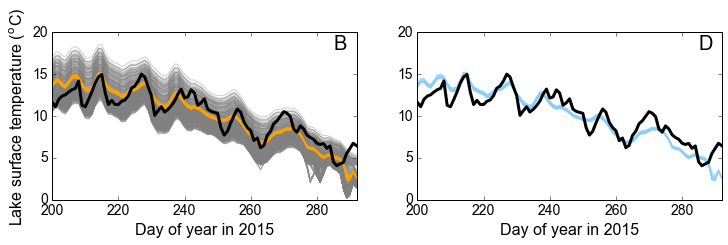

In [12]:
# plot modeled lake temperatures for 1000 calibration simulations with observations from Round Lake (black line)
days = (200,220,240,260,280)
temps= (0,5,10,15,20)
trials = topNSE[-30:]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
for i in range(0,1000):
    ax[0].plot(LST.Julian,LST.iloc[:,i],linewidth=0.1,color="gray")
for i in trials:
    ax[0].plot(LST.Julian,LST.iloc[:,i],linewidth=0.3,color='orange')
ax[0].plot(obs_mon.Julian,obs_mon.Round,linewidth=3.0,color="black")
ax[0].set_xlim(200,292)
ax[0].set_ylim(0,20)
ax[0].set_xlabel("Day of year in 2015",fontname='Arial', fontsize=16)
ax[0].set_ylabel("Lake surface temperature ($\mathregular{^o}$C)",fontname='Arial', fontsize=16)
#ax[0].set_title("All parameter sets",fontname='Arial', fontsize=16)
ax[0].set_xticklabels(days,fontname= 'Arial',fontsize=14)
ax[0].set_yticklabels(temps,fontname= 'Arial',fontsize=14)
ax[0].text(285, 18, "B", fontsize=20, fontname="Arial")

trials = topNSE[-30:]

for i in trials:
    ax[1].plot(LST.Julian,LST.iloc[:,i],linewidth=0.3,color='lightskyblue')
ax[1].plot(obs_mon.Julian,obs_mon.Round,linewidth=3.0,color="black")
ax[1].set_xlim(200,292)
ax[1].set_xlabel("Day of year in 2015",fontname='Arial', fontsize=16)
#ax[1].set_ylabel("Lake temperature ($\mathregular{^o}$C)",fontname='Arial', fontsize=16)
#ax[1].title("Parameter sets maximizing NSE",fontname='Arial', fontsize=16)
ax[1].set_xticklabels(days,fontname= 'Arial',fontsize=14)
ax[1].set_yticklabels(temps,fontname= 'Arial',fontsize=14)
ax[1].text(285, 18, "D", fontsize=20, fontname="Arial")

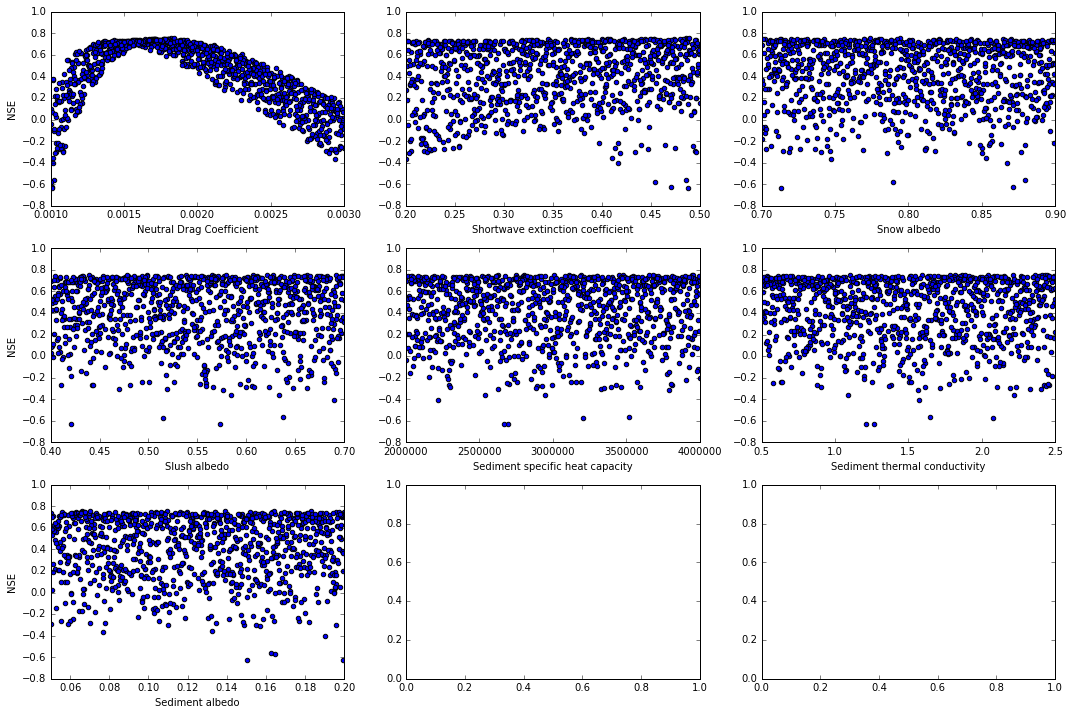

In [8]:
# make scatter plots of parameter values by NSE; each dot is one of the 1000 simulation ensemble
# Note that Neutral Drag Coefficient is most important, followed by shortwave extinction coefficient
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axes[0,0].scatter(LST_stat['cdrn'], LST_stat['NSE'])
axes[0,1].scatter(LST_stat['eta'], LST_stat['NSE'])
axes[0,2].scatter(LST_stat['albsnow'], LST_stat['NSE'])
axes[1,0].scatter(LST_stat['albslush'], LST_stat['NSE'])
axes[1,1].scatter(LST_stat['csed'], LST_stat['NSE'])
axes[1,2].scatter(LST_stat['condsed'], LST_stat['NSE'])
axes[2,0].scatter(LST_stat['albsed'],LST_stat['NSE'])

axes[0,0].set_xlabel('Neutral Drag Coefficient')
axes[0,1].set_xlabel('Shortwave extinction coefficient')
axes[0,2].set_xlabel('Snow albedo')
axes[1,0].set_xlabel('Slush albedo')
axes[1,1].set_xlabel('Sediment specific heat capacity')
axes[1,2].set_xlabel('Sediment thermal conductivity')
axes[2,0].set_xlabel('Sediment albedo')

axes[0,0].set_xlim(0.001,0.003)
axes[0,1].set_xlim(0.2,0.5)
axes[0,2].set_xlim(0.7,0.9)
axes[1,0].set_xlim(0.4,0.7)
axes[1,1].set_xlim(2e6,4e6)
axes[1,2].set_xlim(0.5,2.5)
axes[2,0].set_xlim(0.05,0.2)

axes[0,0].set_ylabel('NSE')
axes[1,0].set_ylabel('NSE')
axes[2,0].set_ylabel('NSE')

plt.tight_layout()
plt.show()

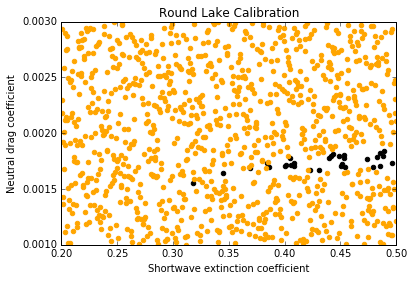

In [9]:
# plot where 30 "best" parameter values sit in drag coefficient-extinction coefficient space
plt.scatter(LST_good['eta'],LST_good['cdrn'],color="black")
plt.scatter(LST_junk['eta'],LST_junk['cdrn'],color='orange')
plt.title('Round Lake Calibration')
plt.ylim(0.001,0.003)
plt.xlim(0.2,0.5)
plt.xlabel('Shortwave extinction coefficient')
plt.ylabel('Neutral drag coefficient')